# Classification

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score

### Loading dataset

In [43]:
mob_price_data = pd.read_csv('datasets/mobile_price.csv')

mob_price_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [44]:
mob_price_data.shape

(2000, 21)

In [45]:
mob_price_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [46]:
NUMERIC_FEATURES = ['battery_power', 'clock_speed', 'fc', 'int_memory',
                    'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width',
                    'ram', 'sc_h', 'sc_w', 'talk_time']

CATEGORIVAL_FEATURES = ['blue', 'dual_sim', 'four_g',
                        'n_cores', 'three_g', 'touch_screen', 'wifi']

In [47]:
len(NUMERIC_FEATURES + CATEGORIVAL_FEATURES), len(mob_price_data.columns)

(20, 21)

In [48]:
mob_price_data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [49]:
mob_price_data[NUMERIC_FEATURES].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21300,1084.732044,256.0,1207.50,2146.5,3064.50,3998.0


### Visualizing Relationship

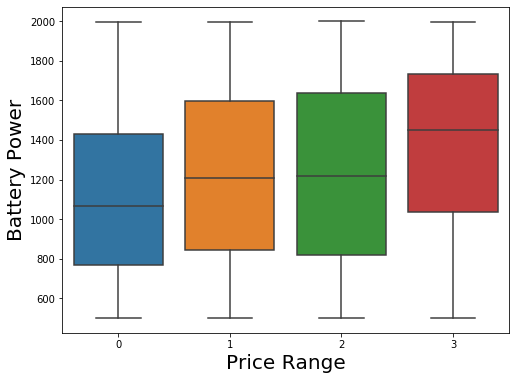

In [50]:
plt.figure(figsize=(8, 6))

sns.boxplot('price_range', 'battery_power', data = mob_price_data)

plt.xlabel('Price Range', fontsize = 20)
plt.ylabel('Battery Power', fontsize = 20)

plt.show()

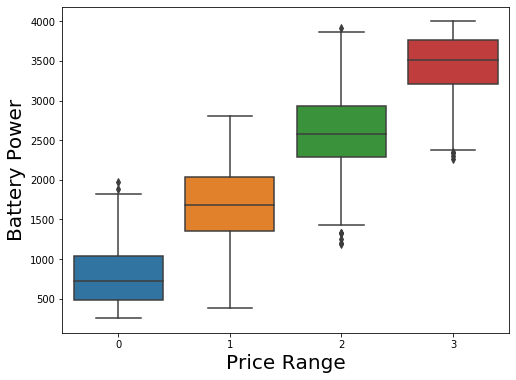

In [51]:
plt.figure(figsize=(8, 6))

sns.boxplot('price_range', 'ram', data = mob_price_data)

plt.xlabel('Price Range', fontsize = 20)
plt.ylabel('Battery Power', fontsize = 20)

plt.show()

### Splitting data into train data and test data

In [52]:
features = mob_price_data.drop('price_range', axis=1)

features

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [53]:
numeric_features = mob_price_data[NUMERIC_FEATURES].copy()

numeric_features.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15


In [54]:
categorical_fetaures = mob_price_data[CATEGORIVAL_FEATURES].copy()

categorical_fetaures.head()

,blue,dual_sim,four_g,n_cores,three_g,touch_screen,wifi
0,0,0,0,2,0,0,1
1,1,1,1,3,1,1,0
2,1,1,1,5,1,1,0
3,1,0,0,6,1,0,0
4,1,0,1,2,1,1,0


In [55]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,2.128298e-16,1.00025,-1.678817,-0.880403,-0.028496,0.857556,1.728812
clock_speed,2000.0,-2.172151e-16,1.00025,-1.253064,-1.007906,-0.027274,0.830779,1.811412
fc,2000.0,9.230117e-17,1.00025,-0.992890,-0.762495,-0.301703,0.619880,3.384628
int_memory,2000.0,-8.754109e-17,1.00025,-1.656260,-0.884535,-0.002563,0.879408,1.761380
m_dep,2000.0,-1.045830e-16,1.00025,-1.393304,-1.046495,-0.006069,1.034357,1.727974
mobile_wt,2000.0,1.804112e-16,1.00025,-1.702391,-0.882969,0.021220,0.840642,1.688320
pc,2000.0,1.669775e-16,1.00025,-1.635631,-0.810929,0.013773,0.838474,1.663176
px_height,2000.0,1.287304e-16,1.00025,-1.454027,-0.816729,-0.182812,0.681006,2.963672
px_width,2000.0,5.595524e-17,1.00025,-1.739251,-0.871958,-0.010450,0.882879,1.727608
ram,2000.0,-1.582068e-16,1.00025,-1.722711,-0.845317,0.020551,0.867055,1.727851


In [56]:
processed_features = pd.concat([numeric_features, categorical_fetaures], axis=1,
                               ignore_index=True, sort=False)

processed_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.902597,0.830779,-0.762495,-1.380644,0.340740,1.349249,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,0,0,0,2,0,0,1
1,-0.495139,-1.253064,-0.992890,1.155024,0.687548,-0.120059,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,1,1,1,3,1,1,0
2,-1.537686,-1.253064,-0.532099,0.493546,1.381165,0.134244,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,1,1,1,5,1,1,0
3,-1.419319,1.198517,-0.992890,-1.215274,1.034357,-0.261339,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,1,0,0,6,1,0,0
4,1.325906,-0.395011,2.002254,0.658915,0.340740,0.021220,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,1,0,1,2,1,1,0


In [57]:
target = mob_price_data[['price_range']]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target, test_size=0.2, random_state=10)

x_train_tensor = torch.from_numpy(x_train.values).float()

x_test_tensor = torch.from_numpy(x_test.values).float()

In [59]:
x_train_tensor.shape, x_test_tensor.shape

(torch.Size([1600, 20]), torch.Size([400, 20]))

In [60]:
y_train_tensor = torch.from_numpy(y_train.values).view(1, -1)[0].long()

y_test_tensor = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [61]:
y_train_tensor.shape, y_test_tensor.shape

(torch.Size([1600]), torch.Size([400]))

In [62]:
y_train_tensor[:5]

tensor([0, 3, 0, 3, 2])

In [63]:
input_size = x_train_tensor.shape[1]

output_size = len(target['price_range'].unique())

In [64]:
input_size, output_size

(20, 4)

### Building model

In [65]:
class Net(nn.Module):
    
    def __init__(self, hidden_size, activation_fn='relu', apply_dropout=False): 
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout1 = None
        self.dropout2 = None
        if apply_dropout:
            self.dropout1 = nn.Dropout(0.2)
            self.dropout2 = nn.Dropout(0.3)
    
    def forward(self, x):
        
        activation_fn = None
        if  self.activation_fn == 'sigmoid':
                activation_fn = F.torch.sigmoid

        elif self.activation_fn == 'tanh':
                activation_fn = F.torch.tanh

        elif self.activation_fn == 'relu':
                 activation_fn = F.relu

        x = activation_fn(self.fc1(x))
        if self.dropout1 != None:
            x = self.dropout1(x)

        x = activation_fn(self.fc2(x))

        if self.dropout2 != None:
            x = self.dropout2(x)

        x = self.fc3(x)
        
        return F.log_softmax(x, dim = -1)

In [66]:
def train_and_evaluate_model(model, epochs=1000, learn_rate=1e-3):
    epoch_data = []
    
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    
    loss_fn = nn.NLLLoss()
    
    test_accuracy = 0.0
    
    for epoch in range(1, epochs + 1):
        
        model.train()
        
        optimizer.zero_grad()

        y_pred_train = model(x_train_tensor)

        loss_train = loss_fn(y_pred_train , y_train_tensor)
        loss_train.backward()

        optimizer.step()

        model.eval()

        y_pred_test = model(x_test_tensor)
        loss_test = loss_fn(y_pred_test, y_test_tensor)

        _, pred = y_pred_test.data.max(1)
        
        test_accuracy = pred.eq(y_test_tensor.data).sum().item() / y_test.values.size
        
        epoch_data.append([epoch, loss_train.data.item(), loss_test.data.item(), test_accuracy])

        if epoch % 100 == 0:
            print ('epoch - %d train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
                   % (epoch, loss_train.data.item(), loss_test.data.item(), test_accuracy))
            

    return {'model' : model,
            'epoch_data' : epoch_data,
            '_, pred' : y_pred_test.data.max(1),
            'actual_test_label' : y_test_tensor}

#### Taken 5 neurons in the hidden layers and sigmoid activation function with no dropout

In [67]:
net = Net(hidden_size=5, activation_fn='sigmoid', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=20, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=4, bias=True)
)

#### Training and evaluating model

In [68]:
result_5_sigmoid = train_and_evaluate_model(net)

epoch - 100 train loss - 1.38 test loss - 1.38 Test accuracy - 0.2675
epoch - 200 train loss - 1.35 test loss - 1.36 Test accuracy - 0.3575
epoch - 300 train loss - 1.27 test loss - 1.29 Test accuracy - 0.4325
epoch - 400 train loss - 1.14 test loss - 1.16 Test accuracy - 0.5400
epoch - 500 train loss - 1.00 test loss - 1.01 Test accuracy - 0.6775
epoch - 600 train loss - 0.88 test loss - 0.90 Test accuracy - 0.7375
epoch - 700 train loss - 0.80 test loss - 0.82 Test accuracy - 0.7925
epoch - 800 train loss - 0.74 test loss - 0.75 Test accuracy - 0.8250
epoch - 900 train loss - 0.69 test loss - 0.71 Test accuracy - 0.8500
epoch - 1000 train loss - 0.65 test loss - 0.67 Test accuracy - 0.8575


In [69]:
result_5_sigmoid = train_and_evaluate_model(net, epochs=2000)

epoch - 100 train loss - 0.61 test loss - 0.62 Test accuracy - 0.8650
epoch - 200 train loss - 0.57 test loss - 0.59 Test accuracy - 0.8775
epoch - 300 train loss - 0.53 test loss - 0.55 Test accuracy - 0.8850
epoch - 400 train loss - 0.49 test loss - 0.51 Test accuracy - 0.8950
epoch - 500 train loss - 0.46 test loss - 0.47 Test accuracy - 0.9025
epoch - 600 train loss - 0.42 test loss - 0.44 Test accuracy - 0.9075
epoch - 700 train loss - 0.38 test loss - 0.40 Test accuracy - 0.9150
epoch - 800 train loss - 0.35 test loss - 0.37 Test accuracy - 0.9225
epoch - 900 train loss - 0.33 test loss - 0.35 Test accuracy - 0.9325
epoch - 1000 train loss - 0.30 test loss - 0.32 Test accuracy - 0.9425
epoch - 1100 train loss - 0.28 test loss - 0.30 Test accuracy - 0.9450
epoch - 1200 train loss - 0.26 test loss - 0.28 Test accuracy - 0.9500
epoch - 1300 train loss - 0.24 test loss - 0.26 Test accuracy - 0.9500
epoch - 1400 train loss - 0.22 test loss - 0.25 Test accuracy - 0.9525
epoch - 1500 tr

#### Taken 5 hidden layers and sigmoid activation function with 0.2 dropout

In [70]:
net = Net(hidden_size=5, activation_fn='sigmoid', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=20, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=4, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
)

#### Training and evaluating model

In [1]:
result_5_sigmoid = train_and_evaluate_model(net, epochs=3000)

NameError: name 'train_and_evaluate_model' is not defined

#### Taken 5 hidden layers and tanh activation function with no dropout

In [72]:
net = Net(hidden_size=10, activation_fn='tanh')

net

Net(
  (fc1): Linear(in_features=20, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=4, bias=True)
)

#### Training and evaluating model

In [73]:
result_10_tanh = train_and_evaluate_model(net)

epoch - 100 train loss - 1.10 test loss - 1.12 Test accuracy - 0.6425
epoch - 200 train loss - 0.70 test loss - 0.72 Test accuracy - 0.8200
epoch - 300 train loss - 0.51 test loss - 0.53 Test accuracy - 0.8900
epoch - 400 train loss - 0.36 test loss - 0.38 Test accuracy - 0.9225
epoch - 500 train loss - 0.27 test loss - 0.29 Test accuracy - 0.9525
epoch - 600 train loss - 0.20 test loss - 0.23 Test accuracy - 0.9600
epoch - 700 train loss - 0.16 test loss - 0.18 Test accuracy - 0.9650
epoch - 800 train loss - 0.13 test loss - 0.16 Test accuracy - 0.9600
epoch - 900 train loss - 0.10 test loss - 0.14 Test accuracy - 0.9600
epoch - 1000 train loss - 0.09 test loss - 0.13 Test accuracy - 0.9575


#### Taken 50 hidden layers and tanh activation function with no dropout

In [74]:
net = Net(hidden_size=10, activation_fn='tanh', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=20, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=4, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
)

#### Training and evaluating model

In [75]:
result_50_tanh = train_and_evaluate_model(net)

epoch - 100 train loss - 1.09 test loss - 1.08 Test accuracy - 0.6350
epoch - 200 train loss - 0.73 test loss - 0.70 Test accuracy - 0.7725
epoch - 300 train loss - 0.56 test loss - 0.53 Test accuracy - 0.8850
epoch - 400 train loss - 0.46 test loss - 0.40 Test accuracy - 0.9000
epoch - 500 train loss - 0.38 test loss - 0.32 Test accuracy - 0.9200
epoch - 600 train loss - 0.32 test loss - 0.26 Test accuracy - 0.9275
epoch - 700 train loss - 0.27 test loss - 0.21 Test accuracy - 0.9625
epoch - 800 train loss - 0.23 test loss - 0.17 Test accuracy - 0.9650
epoch - 900 train loss - 0.23 test loss - 0.15 Test accuracy - 0.9625
epoch - 1000 train loss - 0.20 test loss - 0.13 Test accuracy - 0.9625


#### Taken 50 hidden layers and relu activation function with no dropout

In [76]:
net = Net(hidden_size=10, activation_fn='relu')

net

Net(
  (fc1): Linear(in_features=20, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=4, bias=True)
)

In [77]:
result_50_relu = train_and_evaluate_model(net)

epoch - 100 train loss - 1.13 test loss - 1.14 Test accuracy - 0.5575
epoch - 200 train loss - 0.54 test loss - 0.56 Test accuracy - 0.8775
epoch - 300 train loss - 0.31 test loss - 0.35 Test accuracy - 0.9025
epoch - 400 train loss - 0.21 test loss - 0.25 Test accuracy - 0.9250
epoch - 500 train loss - 0.15 test loss - 0.19 Test accuracy - 0.9475
epoch - 600 train loss - 0.12 test loss - 0.16 Test accuracy - 0.9525
epoch - 700 train loss - 0.10 test loss - 0.14 Test accuracy - 0.9525
epoch - 800 train loss - 0.08 test loss - 0.12 Test accuracy - 0.9575
epoch - 900 train loss - 0.07 test loss - 0.12 Test accuracy - 0.9575
epoch - 1000 train loss - 0.06 test loss - 0.11 Test accuracy - 0.9575


In [78]:
net = Net(hidden_size=50, activation_fn='relu', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=20, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=4, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
)

In [79]:
result_50_relu = train_and_evaluate_model(net)

epoch - 100 train loss - 0.51 test loss - 0.43 Test accuracy - 0.8925
epoch - 200 train loss - 0.25 test loss - 0.21 Test accuracy - 0.9300
epoch - 300 train loss - 0.17 test loss - 0.17 Test accuracy - 0.9425
epoch - 400 train loss - 0.14 test loss - 0.16 Test accuracy - 0.9525
epoch - 500 train loss - 0.10 test loss - 0.16 Test accuracy - 0.9500
epoch - 600 train loss - 0.08 test loss - 0.15 Test accuracy - 0.9550
epoch - 700 train loss - 0.07 test loss - 0.15 Test accuracy - 0.9525
epoch - 800 train loss - 0.06 test loss - 0.15 Test accuracy - 0.9500
epoch - 900 train loss - 0.05 test loss - 0.15 Test accuracy - 0.9525
epoch - 1000 train loss - 0.06 test loss - 0.14 Test accuracy - 0.9675


### creating dataframe for train loss and test loss with accuracy for each epoch

In [80]:
epochs_data = pd.DataFrame(result_50_relu['epoch_data'],
                           columns=['epoch', 'train_loss', 'test_loss','accuracy'])

In [82]:
epochs_data.head(10)

,epoch,train_loss,test_loss,accuracy
0,1,1.387668,1.389468,0.2675
1,2,1.391303,1.385489,0.2700
2,3,1.380373,1.381644,0.2850
3,4,1.377346,1.377870,0.2950
4,5,1.374612,1.374171,0.3250
5,6,1.371532,1.370473,0.3700
6,7,1.366112,1.366773,0.3750
7,8,1.362392,1.363016,0.3825
8,9,1.359701,1.359250,0.3875
9,10,1.357578,1.355436,0.3975


### Visualizing result

#### In the first plot we are showing train and test loss and in the second plot accuracy along with epoch

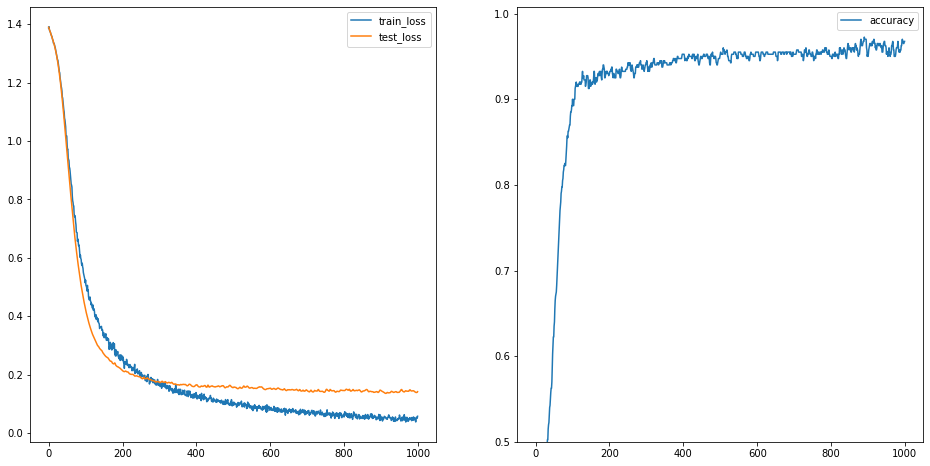

In [83]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

epochs_data[['train_loss', 'test_loss']].plot(ax=ax1)
epochs_data[['accuracy']].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()

### Showing actual and predicted result and calculating confusion matrix

In [84]:
_, pred = result_50_relu['_, pred']

In [85]:
y_pred = pred.detach().numpy()

In [86]:
y_test = result_50_relu['actual_test_label'].detach().numpy()

In [87]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [88]:
pred_results.head(10)

,y_test,y_pred
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
5,3,3
6,3,3
7,3,3
8,1,1
9,3,3


In [89]:
matrix = confusion_matrix(y_test, y_pred)

In [90]:
matrix

array([[ 91,   1,   0,   0],
       [  3,  92,   2,   0],
       [  0,   3, 105,   1],
       [  0,   0,   3,  99]], dtype=int64)

### Calculating precision and recall score

In [92]:
recall_score(y_test, y_pred, average = 'weighted')

0.9675

In [93]:
precision_score(y_test, y_pred, average = 'weighted')

0.9676190441650548